# Assignment-I Task-1

**Task-1** Regression on Web Traffic Time Series (3 marks): The dataset consists of 10k time series sampling from a bigger dataset at Kaggle (https://www.kaggle.com/c/web-traffic-time-series-forecasting/data). Each of these time series represent a number of daily views of a different Wikipedia article, starting from July, 1st, 2015 up until December 31st, 2016. You are required to train a regression prediction model for the number of total daily views of Wikipedia articles based on the historical records of the past few days.

Notes:

1). The data set has not be pre-processed, and you need to consider pre-processing issues like missing value imputation and standardization before training the model.

2). As the goal is to build the model for the total number of daily views, you need to sum the number of daily reviews of all the different article and you will obtain a single time series. 

3). Then, you should perform basic feature extraction by the sliding window technique. Let W be the window size. If the task is to predict the web traffic at time stamp (i.e., day) t, you could construct W features with the historical web traffic numbers at time stamps from t-W to t-1. W is a hyperparameter specifying the number of features should be tuned to achieve a good linear regression model. Data instances after the feature extraction can be regarded as independent of each other.


In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv('data/web-traffic-analysis/web-traffic-time-series_samples-10000.csv')

In [3]:
#We print the percentage of null values that are present in the dataset
print(data.isna().sum()/len(data)*100)

Page         0.00
1/7/15      15.45
2/7/15      15.41
3/7/15      15.42
4/7/15      15.33
            ...  
27/12/16     0.74
28/12/16     0.76
29/12/16     0.74
30/12/16     0.74
31/12/16     0.72
Length: 551, dtype: float64


In [4]:
#Above result shows that null significant amount of null values exist. Hence, instead of simply dropping rows,
#we have chosen to replace missing values with mean values of the column. This method has been chosen because
#the replaced value will not be unpredictable and in worst case scenario, not significantly skew result.
data.fillna(data.mean(), inplace = True)

#Again, we check if any missing value still remain after replacing them with mean values
print(data.isna().sum()/len(data)*100)
print(data.isnull().sum())

Page        0.0
1/7/15      0.0
2/7/15      0.0
3/7/15      0.0
4/7/15      0.0
           ... 
27/12/16    0.0
28/12/16    0.0
29/12/16    0.0
30/12/16    0.0
31/12/16    0.0
Length: 551, dtype: float64
Page        0
1/7/15      0
2/7/15      0
3/7/15      0
4/7/15      0
           ..
27/12/16    0
28/12/16    0
29/12/16    0
30/12/16    0
31/12/16    0
Length: 551, dtype: int64


In [5]:
"""
from sklearn.preprocessing import StandardScaler
ss = StandardScaler(with_mean=True, with_std=True)
x = np.reshape(x, (-1, 1))
ss.fit(x.astype(np.float))
x = ss.transform(x.astype(np.float))

y = np.reshape(y, (-1, 1))  
ss.fit(y.astype(np.float))
y = ss.transform(y.astype(np.float))
"""

'\nfrom sklearn.preprocessing import StandardScaler\nss = StandardScaler(with_mean=True, with_std=True)\nx = np.reshape(x, (-1, 1))\nss.fit(x.astype(np.float))\nx = ss.transform(x.astype(np.float))\n\ny = np.reshape(y, (-1, 1))  \nss.fit(y.astype(np.float))\ny = ss.transform(y.astype(np.float))\n'

In [6]:
#Removing the page label.
data = data.drop('Page', axis=1, inplace=False)

#Let us sum all views in a single day to create a single time series.
sum_columns = data.sum(axis = 0)

#We have successfully created a single time series.
print(sum_columns)


1/7/15      2.046047e+07
2/7/15      2.051105e+07
3/7/15      1.863656e+07
4/7/15      1.939039e+07
5/7/15      1.979334e+07
                ...     
27/12/16    2.843284e+07
28/12/16    2.740848e+07
29/12/16    2.817610e+07
30/12/16    2.497181e+07
31/12/16    2.548296e+07
Length: 550, dtype: float64


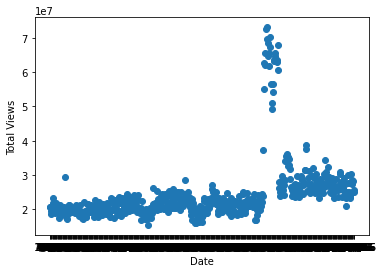

In [7]:
import matplotlib.pyplot as plt
import datetime as dt

#Seperating the dataset into x and y so we can create a graph

x = sum_columns.index.values #extracting dates into x
y = sum_columns.values #extracting total views into y

#Let us plot a graph to see if there is any trend between date and daily views. 
plt.scatter(x, y)
plt.xlabel('Date')
plt.ylabel('Total Views')
plt.show()


In [8]:
#Let us divide the dataset into windows as specified. Information regarding this process and the code below
#has been referenced from https://machinelearningmastery.com/convert-time-series-supervised-learning-problem-python/

from pandas import concat
from pandas import DataFrame

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):

    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

#lets us now try with w = 6
values = sum_columns.values.tolist()
w = 6
data = series_to_supervised(values, w)
print(data)

        var1(t-6)     var1(t-5)     var1(t-4)     var1(t-3)     var1(t-2)  \
6    2.046047e+07  2.051105e+07  1.863656e+07  1.939039e+07  1.979334e+07   
7    2.051105e+07  1.863656e+07  1.939039e+07  1.979334e+07  2.325964e+07   
8    1.863656e+07  1.939039e+07  1.979334e+07  2.325964e+07  2.167306e+07   
9    1.939039e+07  1.979334e+07  2.325964e+07  2.167306e+07  1.918939e+07   
10   1.979334e+07  2.325964e+07  2.167306e+07  1.918939e+07  2.023798e+07   
..            ...           ...           ...           ...           ...   
545  2.771183e+07  2.511488e+07  2.309078e+07  2.396540e+07  2.472120e+07   
546  2.511488e+07  2.309078e+07  2.396540e+07  2.472120e+07  3.012275e+07   
547  2.309078e+07  2.396540e+07  2.472120e+07  3.012275e+07  2.843284e+07   
548  2.396540e+07  2.472120e+07  3.012275e+07  2.843284e+07  2.740848e+07   
549  2.472120e+07  3.012275e+07  2.843284e+07  2.740848e+07  2.817610e+07   

        var1(t-1)       var1(t)  
6    2.325964e+07  2.167306e+07  
7    2.

In [9]:
#Linear regression in python only takes numeric values as input. Hence, we must convert the date values.
#We have chosen the toordinal() function to convert the date values. As the date does not have any time information
#such as minutes or seconds, we can simply use the toordinal function. If time information would have been present
#in the date, we would need to use another function for conversion such as strip(). This however is not required in 
#this case.
x = pd.to_datetime(x)
x = x.map(dt.datetime.toordinal)
print(x)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler(with_mean=True, with_std=True)
x = np.reshape(x, (-1, 1))
ss.fit(x.astype(np.float))
x = ss.transform(x.astype(np.float))

y = np.reshape(y, (-1, 1))  
ss.fit(y.astype(np.float))
y = ss.transform(y.astype(np.float))

print(x)

Int64Index([735605, 735636, 735664, 735695, 735725, 735756, 735786, 735817,
            735848, 735878,
            ...
            736320, 736321, 736322, 736323, 736324, 736325, 736326, 736327,
            736328, 736329],
           dtype='int64', length=550)
[[-2.46260359e+00]
 [-2.28828440e+00]
 [-2.13083481e+00]
 [-1.95651562e+00]
 [-1.78781963e+00]
 [-1.61350045e+00]
 [-1.44480446e+00]
 [-1.27048527e+00]
 [-1.09616608e+00]
 [-9.27470095e-01]
 [-7.53150907e-01]
 [-5.84454919e-01]
 [-1.41106526e+00]
 [-1.40544206e+00]
 [-1.39981886e+00]
 [-1.39419566e+00]
 [-1.38857246e+00]
 [-1.38294926e+00]
 [-1.37732606e+00]
 [-1.37170286e+00]
 [-1.36607966e+00]
 [-1.36045646e+00]
 [-1.35483326e+00]
 [-1.34921007e+00]
 [-1.34358687e+00]
 [-1.33796367e+00]
 [-1.33234047e+00]
 [-1.32671727e+00]
 [-1.32109407e+00]
 [-1.31547087e+00]
 [-1.30984767e+00]
 [-2.45698039e+00]
 [-2.28266120e+00]
 [-2.12521161e+00]
 [-1.95089242e+00]
 [-1.78219643e+00]
 [-1.60787725e+00]
 [-1.43918126e+00]
 [-1.26486207e+

In [10]:
x = data.drop('var1(t)',axis=1, inplace=False)
#Let us not print our new dataset to see the result
print(x)
#storing the daily views in y so we can build our model in the next step.
y = data['var1(t)']
print(y)

        var1(t-6)     var1(t-5)     var1(t-4)     var1(t-3)     var1(t-2)  \
6    2.046047e+07  2.051105e+07  1.863656e+07  1.939039e+07  1.979334e+07   
7    2.051105e+07  1.863656e+07  1.939039e+07  1.979334e+07  2.325964e+07   
8    1.863656e+07  1.939039e+07  1.979334e+07  2.325964e+07  2.167306e+07   
9    1.939039e+07  1.979334e+07  2.325964e+07  2.167306e+07  1.918939e+07   
10   1.979334e+07  2.325964e+07  2.167306e+07  1.918939e+07  2.023798e+07   
..            ...           ...           ...           ...           ...   
545  2.771183e+07  2.511488e+07  2.309078e+07  2.396540e+07  2.472120e+07   
546  2.511488e+07  2.309078e+07  2.396540e+07  2.472120e+07  3.012275e+07   
547  2.309078e+07  2.396540e+07  2.472120e+07  3.012275e+07  2.843284e+07   
548  2.396540e+07  2.472120e+07  3.012275e+07  2.843284e+07  2.740848e+07   
549  2.472120e+07  3.012275e+07  2.843284e+07  2.740848e+07  2.817610e+07   

        var1(t-1)  
6    2.325964e+07  
7    2.167306e+07  
8    1.918939e+

In [11]:
x,y = np.array(x),np.array(y)
print(x.shape)
print(y.shape)

(544, 6)
(544,)


In [12]:
# Split data
from sklearn import model_selection as ms
X_train, X_test, y_train, y_test = ms.train_test_split(x, y, test_size=0.2)

print("training data feature shape:", X_train.shape)
print("training data label shape:", y_train.shape)
print("test data feature space shape:", X_test.shape)
print("test data label shape:", y_test.shape)

training data feature shape: (435, 6)
training data label shape: (435,)
test data feature space shape: (109, 6)
test data label shape: (109,)


In [13]:
#Let us now build our linear regression model
from sklearn import linear_model as lm
ordinaryLRmodel = lm.LinearRegression()
ordinaryLRmodel.fit(X_train, y_train)

LinearRegression()

In [14]:
# Printing the coefficients
print("coefficient:", ordinaryLRmodel.coef_)
print("intercept:", ordinaryLRmodel.intercept_)

coefficient: [ 0.03528463  0.0549513   0.095598   -0.16862041 -0.09538374  1.07526188]
intercept: 206589.51740968227


In [15]:
y_pred = ordinaryLRmodel.predict(X_test)
y_pred

array([26696198.71680693, 28183703.89144222, 24219560.52448659,
       68443705.11538917, 18749399.68728544, 20998271.36228067,
       26667092.81980263, 30062152.91148155, 22823402.13067102,
       18105685.24072441, 20339498.53883711, 20845950.7974945 ,
       21732607.34590557, 31073214.35799769, 28507132.67723227,
       21278960.96911404, 66905786.92078048, 27708719.43388546,
       21510616.51624362, 19188659.44881079, 25416658.78370472,
       24543897.18994649, 21415348.45584644, 16150097.23587278,
       22301223.70419276, 22930048.38687704, 27353226.32748495,
       21643969.78927895, 27663896.1290485 , 31530509.60897007,
       27106595.82378801, 18899197.30500039, 18448730.48304528,
       27538788.54753888, 21418947.43652919, 18295496.88024861,
       27503767.64780983, 30532540.88698518, 25428846.31308947,
       19725464.262616  , 21269900.7640141 , 26703841.72364794,
       19164870.40036748, 63113290.42980874, 23372881.93434112,
       23847974.87303215, 21564483.89395

In [16]:
#Let us print some performance metrics
from sklearn.metrics import mean_squared_error, r2_score

#The mean squared error
print('Mean squared error: %.2f' %mean_squared_error(y_test, y_pred))

#The coefficient of determination
print('Coefficient of determination: %.2f' %r2_score(y_test, y_pred))

Mean squared error: 16699224851501.82
Coefficient of determination: 0.88
